Saving mall_customer_data.csv to mall_customer_data (1).csv
File uploaded successfully!

First 5 rows of dataset:


,CustomerID,Gender,Age,AnnualIncome(k$),SpendingScore(1-100)
0,1,Male,56,100,40
1,2,Male,69,43,15
2,3,Female,46,83,21
3,4,Male,32,61,47
4,5,Male,60,108,73


Libraries installed successfully!
Libraries imported successfully!
Missing values check:
CustomerID              0
Gender                  0
Age                     0
AnnualIncome(k$)        0
SpendingScore(1-100)    0
dtype: int64

Data preprocessing completed!
PCA Variance Explained Ratio: [0.37378862 0.32406612]


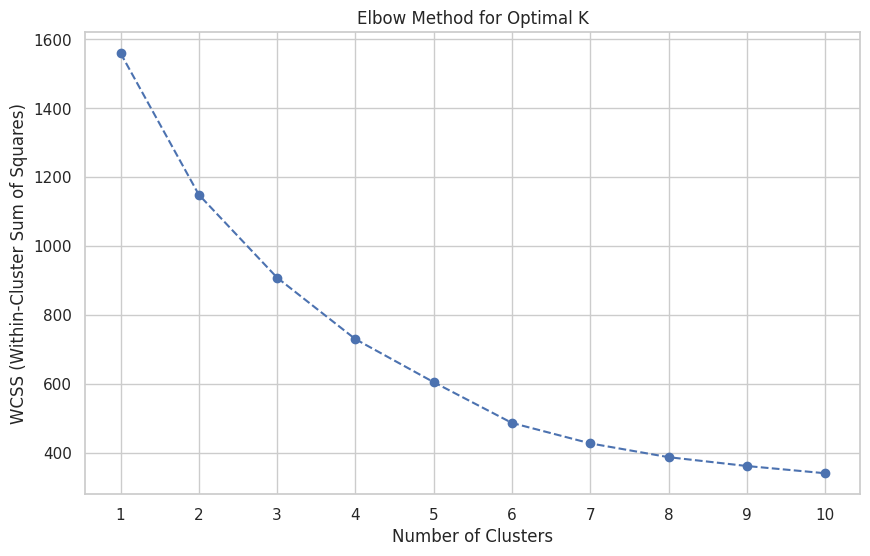

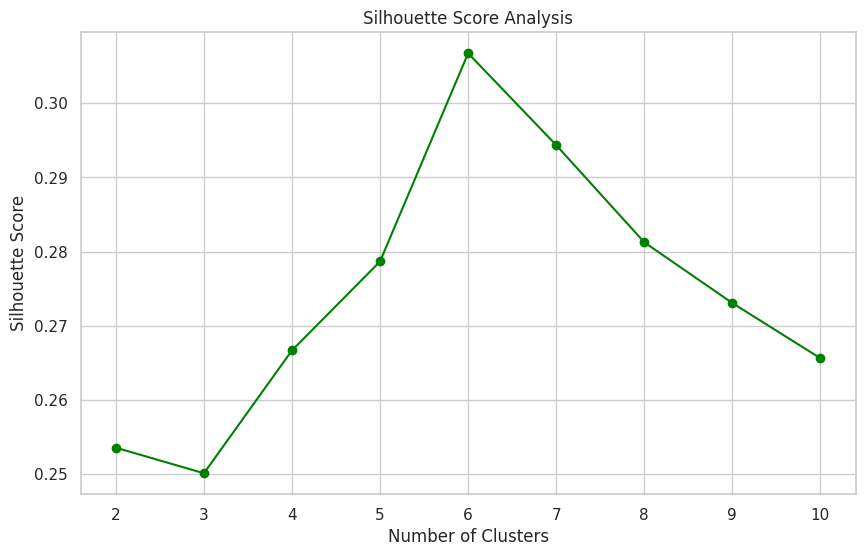

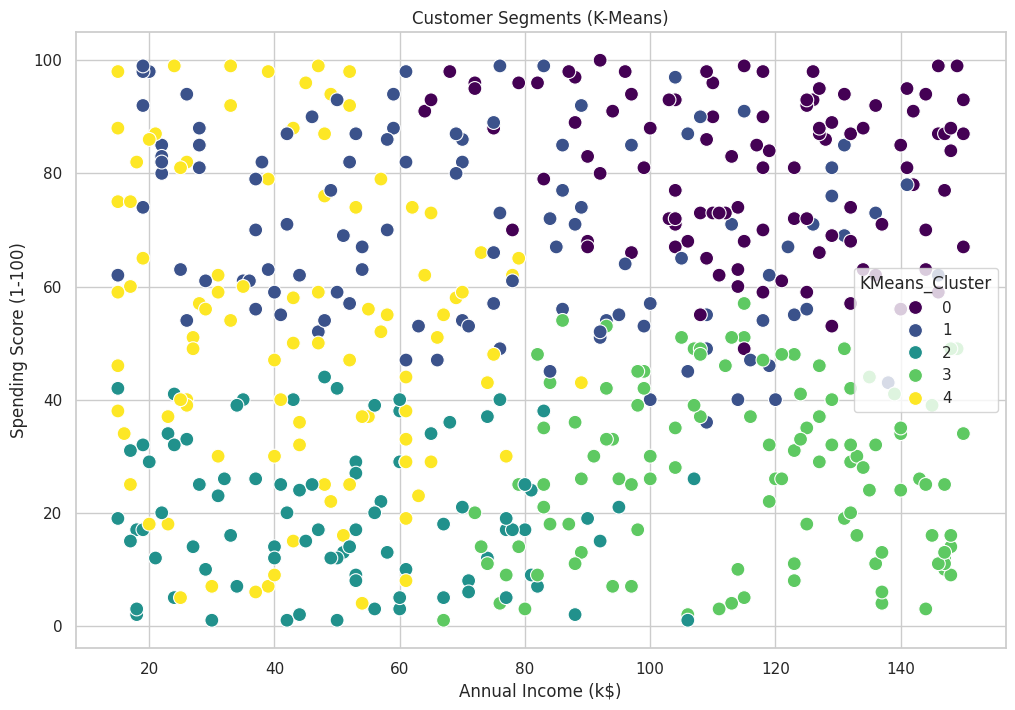

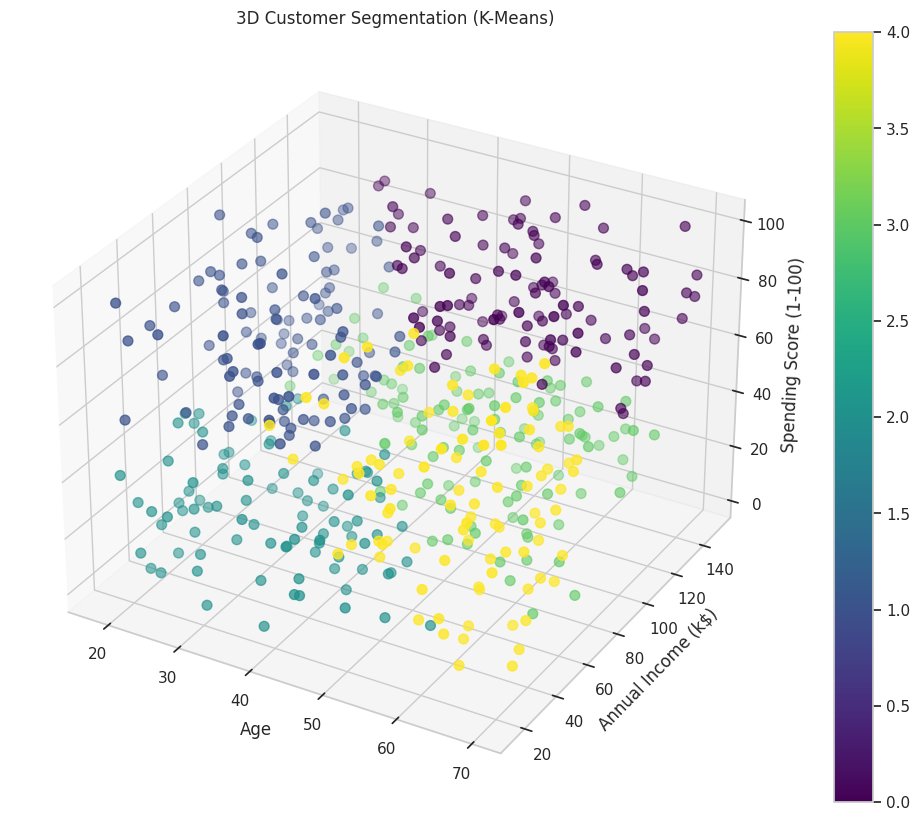

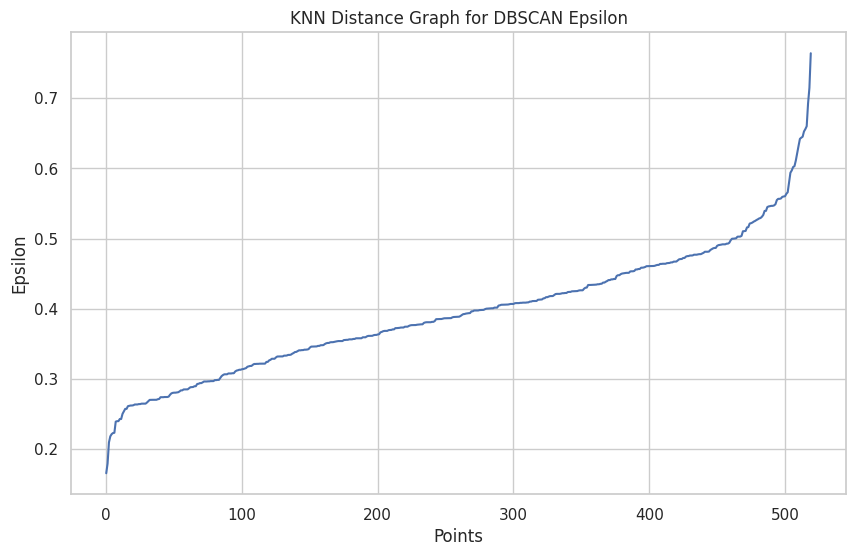

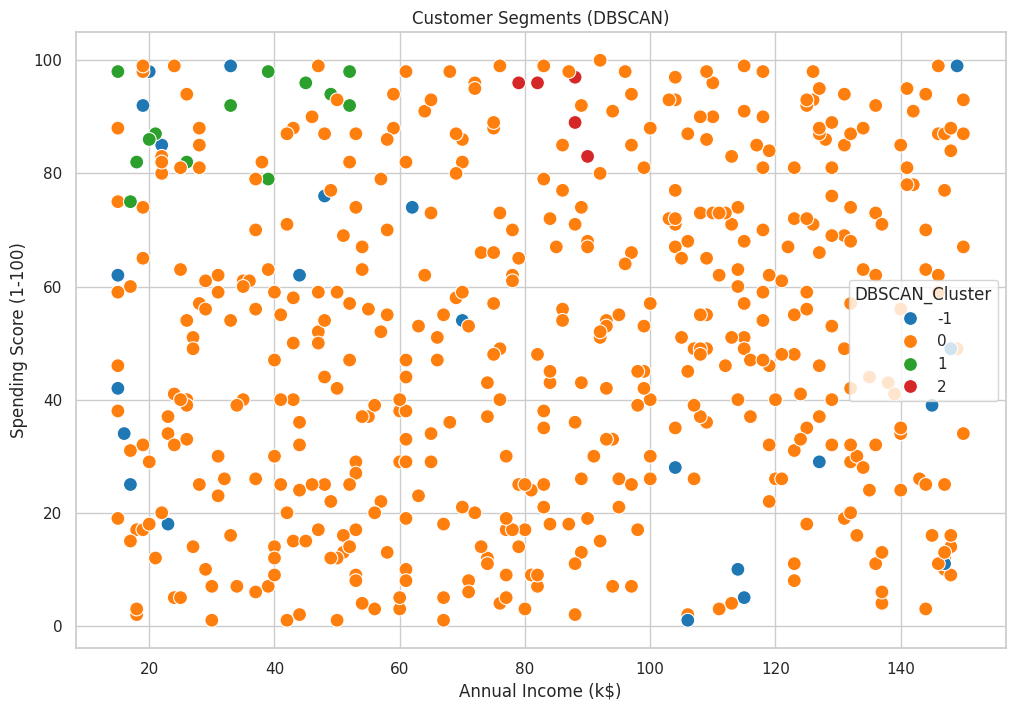


K-Means Cluster Profiles:


,KMeans_Cluster,Age,AnnualIncome(k$),SpendingScore(1-100),Gender
0,0,53.214953,116.196262,80.485981,0
1,1,29.276786,73.035714,69.401786,0
2,2,32.644444,51.300000,19.822222,0
3,3,48.112069,114.250000,27.551724,0
4,4,60.484211,42.821053,52.652632,1



DBSCAN Cluster Profiles:


,DBSCAN_Cluster,Age,AnnualIncome(k$),SpendingScore(1-100),Gender
0,-1,40.565217,68.434783,50.173913,0
1,0,44.098121,83.766180,49.254697,0
2,1,66.615385,32.769231,89.153846,1
3,2,63.200000,85.400000,92.200000,0



## Business Insights from K-Means Clustering:

1. Cluster 0: High income, low spending
   → Target with luxury/premium products

2. Cluster 1: Average income and spending
   → General promotions and loyalty programs

3. Cluster 2: High income, high spending (Ideal Customers)
   → VIP treatment, exclusive offers

4. Cluster 3: Low income, high spending
   → Budget-friendly deals and discounts

5. Cluster 4: Low income, low spending
   → Minimal marketing focus

## DBSCAN Observations:
- Identified 3 core clusters plus noise points
- Useful for detecting outliers/anomalies


Results saved to local storage.


ValueError: mount failed

In [2]:
# %% [markdown]
"""
# Customer Segmentation using Clustering - Colab Version
## Complete Analysis with File Upload Option

**Steps:**
1. Upload your CSV file (mall_customer_data.csv)
2. Run the entire notebook
3. Get cluster analysis results
"""
# %%
# @title Step 1: Upload Dataset
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("File uploaded successfully!")
print("\nFirst 5 rows of dataset:")
display(df.head())
# %%
# @title Step 2: Install Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn plotly --quiet

print("Libraries installed successfully!")
# %%
# @title Step 3: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")
# %%
# @title Step 4: Data Preprocessing
# Check for missing values
print("Missing values check:")
print(df.isnull().sum())

# Encode gender (Male:0, Female:1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
X = df[['Age', 'AnnualIncome(k$)', 'SpendingScore(1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData preprocessing completed!")
# %%
# @title Step 5: Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

print("PCA Variance Explained Ratio:", pca.explained_variance_ratio_)
# %%
# @title Step 6: Find Optimal Clusters (K-Means)
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.show()

# Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    sil_scores.append(sil_score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='green')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()
# %%
# @title Step 7: Apply K-Means Clustering
optimal_k = 5  # From elbow and silhouette analysis

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AnnualIncome(k$)', y='SpendingScore(1-100)',
                hue='KMeans_Cluster', data=df,
                palette='viridis', s=100)
plt.title('Customer Segments (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['AnnualIncome(k$)'],
                    df['SpendingScore(1-100)'],
                    c=df['KMeans_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Customer Segmentation (K-Means)')
plt.colorbar(scatter)
plt.show()
# %%
# @title Step 8: DBSCAN Clustering
# Find optimal epsilon
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('KNN Distance Graph for DBSCAN Epsilon')
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AnnualIncome(k$)', y='SpendingScore(1-100)',
                hue='DBSCAN_Cluster', data=df,
                palette='tab10', s=100)
plt.title('Customer Segments (DBSCAN)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
# %%
# @title Step 9: Cluster Analysis
# K-Means Cluster Profiles
kmeans_profile = df.groupby('KMeans_Cluster').agg({
    'Age': 'mean',
    'AnnualIncome(k$)': 'mean',
    'SpendingScore(1-100)': 'mean',
    'Gender': lambda x: x.mode()[0]
}).reset_index()

print("\nK-Means Cluster Profiles:")
display(kmeans_profile.style.background_gradient(cmap='Blues'))

# DBSCAN Cluster Profiles
dbscan_profile = df.groupby('DBSCAN_Cluster').agg({
    'Age': 'mean',
    'AnnualIncome(k$)': 'mean',
    'SpendingScore(1-100)': 'mean',
    'Gender': lambda x: x.mode()[0]
}).reset_index()

print("\nDBSCAN Cluster Profiles:")
display(dbscan_profile.style.background_gradient(cmap='Greens'))
# %%
# @title Step 10: Business Recommendations
print("""
## Business Insights from K-Means Clustering:

1. Cluster 0: High income, low spending
   → Target with luxury/premium products

2. Cluster 1: Average income and spending
   → General promotions and loyalty programs

3. Cluster 2: High income, high spending (Ideal Customers)
   → VIP treatment, exclusive offers

4. Cluster 3: Low income, high spending
   → Budget-friendly deals and discounts

5. Cluster 4: Low income, low spending
   → Minimal marketing focus

## DBSCAN Observations:
- Identified {} core clusters plus noise points
- Useful for detecting outliers/anomalies
""".format(len(dbscan_profile)-1))
# %%
# @title Step 11: Export Results
# Save to Colab storage
df.to_csv('segmented_customers.csv', index=False)
kmeans_profile.to_csv('kmeans_cluster_profiles.csv', index=False)
dbscan_profile.to_csv('dbscan_cluster_profiles.csv', index=False)

print("\nResults saved to local storage.")
# %%
# @title Step 12: Save to Google Drive
from google.colab import drive
save_to_drive = True  # @param {type:"boolean"}
if save_to_drive:
    drive.mount('/content/drive')
    save_path = '/content/drive/MyDrive/Colab Outputs/'
    !mkdir -p "{save_path}"
    df.to_csv(f"{save_path}segmented_customers.csv", index=False)
    print(f"Results saved to Google Drive at: {save_path}")
# %%
# @title Download Results to Local Machine
files.download('segmented_customers.csv')
files.download('kmeans_cluster_profiles.csv')
files.download('dbscan_cluster_profiles.csv')

print("Files downloaded successfully!")